<a href="https://colab.research.google.com/github/AmHannaNabila/AIPROJECT/blob/main/NEWBird_Species_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount Google Drive

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive

Mounted at /content/drive/
/content/drive/My Drive


setting Up Directories and Classes:

In [ ]:
import os
import shutil
import random

# Define the base directory where the images are stored
base_dir = '/content/drive/My Drive/Ai_Project'

# Define the bird types (classes)
bird_species = ['Crow', 'Eagle', 'Goldfinch', 'Parrot', 'Sparrows']

# Define the split ratios
train_ratio = 0.15
val_ratio = 0.15
test_ratio = 0.7

# Function to split dataset
def split_dataset(base_dir, classes, train_ratio, val_ratio, test_ratio):
    for class_name in classes:
        class_dir = os.path.join(base_dir, class_name)
        images = os.listdir(class_dir)
        random.shuffle(images)  # Shuffle the images

        total_images = len(images)
        train_size = int(train_ratio * total_images)
        val_size = int(val_ratio * total_images)
        test_size = total_images - train_size - val_size

        train_images = images[:train_size]
        val_images = images[train_size:train_size + val_size]
        test_images = images[train_size + val_size:]

        # Create directories for train, val, test splits if they don't exist
        for subset in ['train', 'val', 'test']:
            subset_dir = os.path.join(base_dir, subset, class_name)
            if not os.path.exists(subset_dir):
                os.makedirs(subset_dir)

        # Move images to respective directories
        for subset, subset_images in zip(['train', 'val', 'test'], [train_images, val_images, test_images]):
            subset_dir = os.path.join(base_dir, subset, class_name)
            for img in subset_images:
                src_path = os.path.join(class_dir, img)
                dst_path = os.path.join(subset_dir, img)
                shutil.move(src_path, dst_path)
                print(f"Moved {img} to {subset_dir}")

# Split the dataset
split_dataset(base_dir, bird_species, train_ratio, val_ratio, test_ratio)

print("Dataset split completed.")

Moved crow_175.jpg to /content/drive/My Drive/Ai_Project/train/Crow
Moved crow_291.jpg to /content/drive/My Drive/Ai_Project/train/Crow
Moved crow_80.jpg to /content/drive/My Drive/Ai_Project/train/Crow
Moved crow_124 (1).jpg to /content/drive/My Drive/Ai_Project/train/Crow
Moved crow_68 (1).jpg to /content/drive/My Drive/Ai_Project/train/Crow
Moved crow_133.jpg to /content/drive/My Drive/Ai_Project/train/Crow
Moved crow_91 (1).jpg to /content/drive/My Drive/Ai_Project/train/Crow
Moved crow_211.jpg to /content/drive/My Drive/Ai_Project/train/Crow
Moved crow_128 (1).jpg to /content/drive/My Drive/Ai_Project/train/Crow
Moved crow_96 (1).jpg to /content/drive/My Drive/Ai_Project/train/Crow
Moved crow_116.jpg to /content/drive/My Drive/Ai_Project/train/Crow
Moved crow_166 (1).jpg to /content/drive/My Drive/Ai_Project/train/Crow
Moved crow_312 (1).jpg to /content/drive/My Drive/Ai_Project/train/Crow
Moved crow_116 (1).jpg to /content/drive/My Drive/Ai_Project/train/Crow
Moved crow_365.jpg t

Importing Libraries

Import Required Libraries

We begin by importing the necessary libraries from TensorFlow and Keras.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Define Constants and Parameters

Set up the parameters and constants that will be used throughout the process, including input shape, number of classes, batch size, number of epochs, and learning rate.

In [ ]:
# Define constants and parameters
input_shape = (224, 224, 3)
num_classes = 5
batch_size = 32
epochs = 20
learning_rate = 0.001

Set Up Data Generators

Create data generators for training and validation datasets. The ImageDataGenerator class is used to augment images and rescale pixel values.

In [ ]:
# Set up data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/Ai_Project/train',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    '/content/drive/My Drive/Ai_Project/val',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1199 images belonging to 5 classes.
Found 1200 images belonging to 5 classes.


Load Data with Generators

Use the data generators to load the images from the specified directories and prepare them for training and validation.

In [ ]:
# Check number of samples in train_generator
print("Number of training samples:", train_generator.n)

# Calculate steps_per_epoch based on the number of samples and batch size
steps_per_epoch = train_generator.n // batch_size

Number of training samples: 1199


Define the CNN Model

Build the convolutional neural network (CNN) model using Keras' Sequential API.

In [ ]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

Compile the Model

Compile the model with the Adam optimizer and categorical cross-entropy loss function.

In [ ]:
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Check number of samples in train_generator
print("Number of training samples:", train_generator.n)

# Check the value of batch_size
print("Batch size:", batch_size)

# Calculate steps_per_epoch based on the number of samples and batch size
# Handle the case where batch_size might be larger than the number of samples
steps_per_epoch = (train_generator.n + batch_size - 1) // batch_size

print("Steps per epoch:", steps_per_epoch)

Number of training samples: 1199
Batch size: 32
Steps per epoch: 38


In [ ]:
# Check if matplotlib is installed and get its version
import matplotlib
print("Matplotlib version:", matplotlib.__version__)

# If you need to install or upgrade matplotlib
!pip install matplotlib

# Verify installation
import matplotlib
print("Matplotlib version:", matplotlib.__version__)

Matplotlib version: 3.7.1
Matplotlib version: 3.7.1


In [ ]:
# Calculate steps per epoch
steps_per_epoch = (train_generator.n + batch_size - 1) // batch_size  # Handle cases where num_samples < batch_size
validation_steps = (val_generator.n + batch_size - 1) // batch_size  # Similar handling for validation steps

# Build and compile the model
# ... (Rest of your code remains the same)

New Section

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, DenseNet121, MobileNetV3Small
import matplotlib.pyplot as plt
import numpy as np
import os


In [ ]:
# Constants
input_shape = (224, 224, 3)
num_classes = 5  # Number of bird species classes
batch_size = 32
epochs = 20
learning_rate = 0.001

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/Ai_Project/train',
    target_size=(350, 350),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    '/content/drive/My Drive/Ai_Project/val',
    target_size=(350, 350),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 1199 images belonging to 5 classes.
Found 1200 images belonging to 5 classes.


New Section

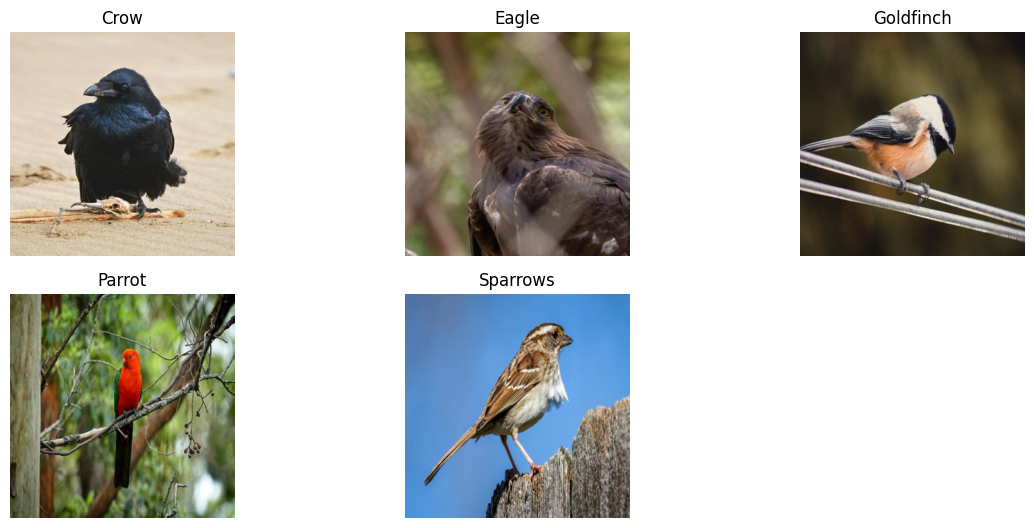

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the base directory where the images are stored
base_dir = '/content/drive/My Drive/Ai_Project'

# Define the bird types (classes)
bird_species = ['Crow', 'Eagle', 'Goldfinch', 'Parrot', 'Sparrows']

# Function to visualize sample images from each class
def visualize_dataset(base_dir, classes):
    plt.figure(figsize=(12, 8))
    for i, class_name in enumerate(classes, start=1):
        class_dir = os.path.join(base_dir, 'train', class_name)
        random_image = random.choice(os.listdir(class_dir))
        img_path = os.path.join(class_dir, random_image)
        img = mpimg.imread(img_path)
        plt.subplot(3, 3, i)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize sample images from each class
visualize_dataset(base_dir, bird_species)


In [ ]:
# Define the CNN architectures
models = {

"ResNet50": ResNet50(weights='imagenet', include_top=False,
input_shape=(350, 350, 3)),
"DenseNet121": DenseNet121(weights='imagenet', include_top=False,
input_shape=(350, 350, 3)),
"MobileNetV3Small": MobileNetV3Small(weights='imagenet', include_top=False,
input_shape=(350, 350, 3))
}

29084464/29084464 [==============================] - 2s 0us/step


4334752/4334752 [==============================] - 1s 0us/step


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Define the base directory where the images are stored
base_dir = '/content/drive/My Drive/Ai_Project'

# Define the bird types (classes)
bird_species = ['Crow', 'Eagle', 'Goldfinch', 'Parrot', 'Sparrows']


In [ ]:
# ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_batches = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_batches = valid_datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_batches = test_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 1199 images belonging to 5 classes.
Found 1200 images belonging to 5 classes.
Found 5589 images belonging to 5 classes.


In [ ]:
# Define the model architecture
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(bird_species), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
epochs = 50
history = model.fit(
    train_batches,
    epochs=epochs,
    validation_data=valid_batches
)


Epoch 1/50
38/38 [==============================] - 2009s 52s/step - loss: 1.0085 - accuracy: 0.6163 - val_loss: 2.0251 - val_accuracy: 0.2000
Epoch 2/50
38/38 [==============================] - 20s 518ms/step - loss: 0.3705 - accuracy: 0.8882 - val_loss: 2.9395 - val_accuracy: 0.2000
Epoch 3/50
38/38 [==============================] - 20s 512ms/step - loss: 0.1899 - accuracy: 0.9358 - val_loss: 3.4340 - val_accuracy: 0.2008
Epoch 4/50
38/38 [==============================] - 20s 522ms/step - loss: 0.1578 - accuracy: 0.9533 - val_loss: 1.9411 - val_accuracy: 0.2050
Epoch 5/50
38/38 [==============================] - 20s 520ms/step - loss: 0.0900 - accuracy: 0.9683 - val_loss: 2.3977 - val_accuracy: 0.2042
Epoch 6/50
38/38 [==============================] - 19s 511ms/step - loss: 0.0906 - accuracy: 0.9716 - val_loss: 3.6518 - val_accuracy: 0.2017
Epoch 7/50
38/38 [==============================] - 20s 517ms/step - loss: 0.0521 - accuracy: 0.9791 - val_loss: 2.8948 - val_accuracy: 0.2058

In [ ]:
# Evaluate the model on test data
print("Evaluating on test data...")
test_loss, test_accuracy = model.evaluate(test_batches)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict classes for test data
print("Predicting on test data...")
y_true = test_batches.classes
y_pred_probabilities = model.predict(test_batches)
y_pred_classes = np.argmax(y_pred_probabilities, axis=-1)


Evaluating on test data...
175/175 [==============================] - 4548s 26s/step - loss: 1.6485 - accuracy: 0.7089
Test Accuracy: 0.7089
Predicting on test data...
175/175 [==============================] - 21s 112ms/step


In [ ]:
# ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_batches = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(350, 350),
    batch_size=32,
    class_mode='categorical'
)

valid_batches = valid_datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=(350, 350),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_batches = test_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=(350, 350),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 1199 images belonging to 5 classes.
Found 1200 images belonging to 5 classes.
Found 5589 images belonging to 5 classes.


Found 1199 images belonging to 5 classes.
Found 1200 images belonging to 5 classes.
Found 5589 images belonging to 5 classes.
Class indices: {'Crow': 0, 'Eagle': 1, 'Goldfinch': 2, 'Parrot': 3, 'Sparrows': 4}
Epoch 1/50
38/38 [==============================] - 48s 530ms/step - loss: 0.9764 - accuracy: 0.6280 - val_loss: 1.6822 - val_accuracy: 0.2033
Epoch 2/50
38/38 [==============================] - 20s 514ms/step - loss: 0.3820 - accuracy: 0.8641 - val_loss: 1.8130 - val_accuracy: 0.2017
Epoch 3/50
38/38 [==============================] - 20s 515ms/step - loss: 0.1935 - accuracy: 0.9408 - val_loss: 1.8006 - val_accuracy: 0.1975
Epoch 4/50
38/38 [==============================] - 20s 524ms/step - loss: 0.1251 - accuracy: 0.9641 - val_loss: 1.8267 - val_accuracy: 0.2092
Epoch 5/50
38/38 [==============================] - 20s 518ms/step - loss: 0.0905 - accuracy: 0.9700 - val_loss: 2.2214 - val_accuracy: 0.1967
Epoch 6/50
38/38 [==============================] - 20s 523ms/step - loss: 0

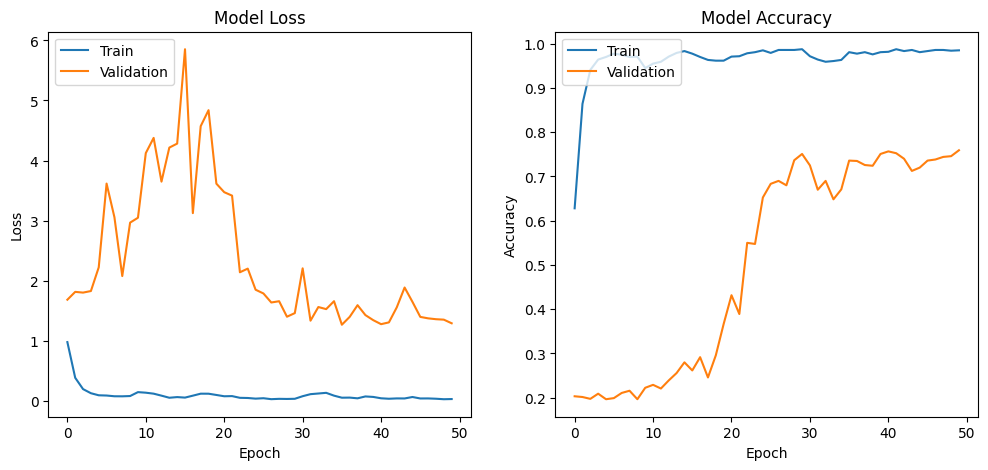

Evaluating on test data...
175/175 [==============================] - 20s 114ms/step - loss: 1.4093 - accuracy: 0.7404
Test Accuracy: 0.7404
Predicting on test data...
175/175 [==============================] - 20s 111ms/step
Confusion matrix, without normalization
[[829 128  69  26  55]
 [ 87 970  38   7  18]
 [ 78 158 564 157 164]
 [ 17  69  97 909  28]
 [ 67  57 112  19 866]]
Normalized confusion matrix
[[0.74887082 0.11562782 0.06233062 0.0234869  0.04968383]
 [0.07767857 0.86607143 0.03392857 0.00625    0.01607143]
 [0.06958073 0.14094558 0.50312221 0.14005352 0.14629795]
 [0.01517857 0.06160714 0.08660714 0.81160714 0.025     ]
 [0.05976806 0.05084746 0.09991079 0.01694915 0.77252453]]


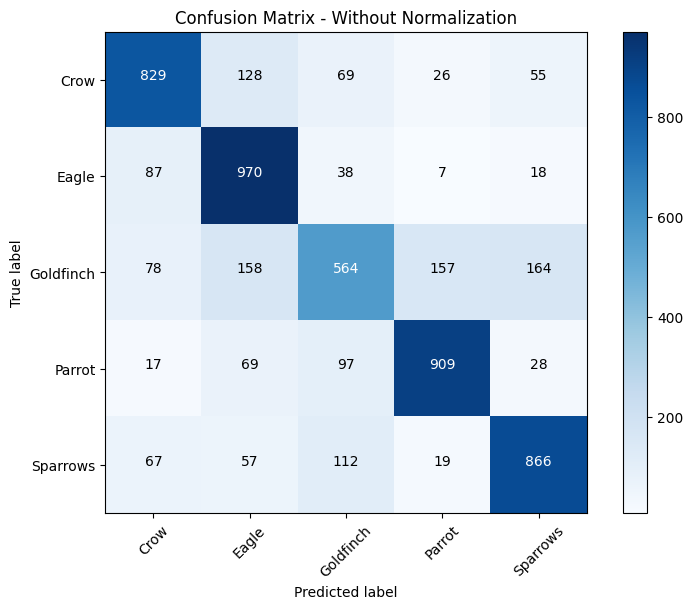

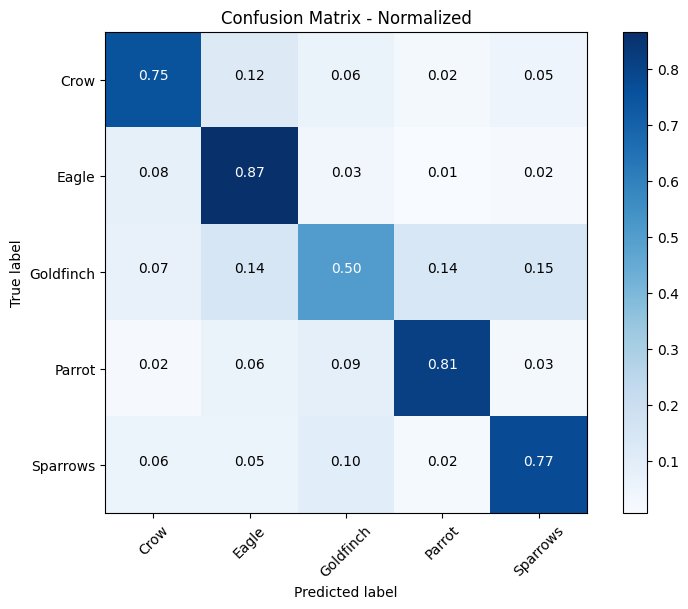

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# Define the base directory where the images are stored
base_dir = '/content/drive/My Drive/Ai_Project'

# Define the bird species (classes)
bird_species = ['Crow', 'Eagle', 'Goldfinch', 'Parrot', 'Sparrows']

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_batches = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_batches = valid_datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_batches = test_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Print the class indices to verify the correct classes are read
print("Class indices:", train_batches.class_indices)

# Define the model architecture
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(bird_species), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 50
history = model.fit(
    train_batches,
    epochs=epochs,
    validation_data=valid_batches
)

# Plot training & validation loss values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Evaluate the model on test data
print("Evaluating on test data...")
test_loss, test_accuracy = model.evaluate(test_batches)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict classes for test data
print("Predicting on test data...")
y_true = test_batches.classes
y_pred_probabilities = model.predict(test_batches)
y_pred_classes = np.argmax(y_pred_probabilities, axis=-1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=bird_species, title='Confusion Matrix - Without Normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=bird_species, normalize=True, title='Confusion Matrix - Normalized')

plt.show()


Found 1199 images belonging to 5 classes.
Found 1200 images belonging to 5 classes.
Found 5589 images belonging to 5 classes.
Class indices: {'Crow': 0, 'Eagle': 1, 'Goldfinch': 2, 'Parrot': 3, 'Sparrows': 4}
Epoch 1/50
38/38 [==============================] - 93s 727ms/step - loss: 0.9697 - accuracy: 0.6380 - val_loss: 0.7477 - val_accuracy: 0.7150
Epoch 2/50
38/38 [==============================] - 20s 518ms/step - loss: 0.4259 - accuracy: 0.8507 - val_loss: 0.9212 - val_accuracy: 0.6900
Epoch 3/50
38/38 [==============================] - 20s 515ms/step - loss: 0.2457 - accuracy: 0.9258 - val_loss: 0.8021 - val_accuracy: 0.7383
Epoch 4/50
38/38 [==============================] - 20s 515ms/step - loss: 0.1605 - accuracy: 0.9500 - val_loss: 0.7261 - val_accuracy: 0.7617
Epoch 5/50
38/38 [==============================] - 20s 527ms/step - loss: 0.1282 - accuracy: 0.9650 - val_loss: 0.7293 - val_accuracy: 0.7800
Epoch 6/50
38/38 [==============================] - 20s 518ms/step - loss: 0

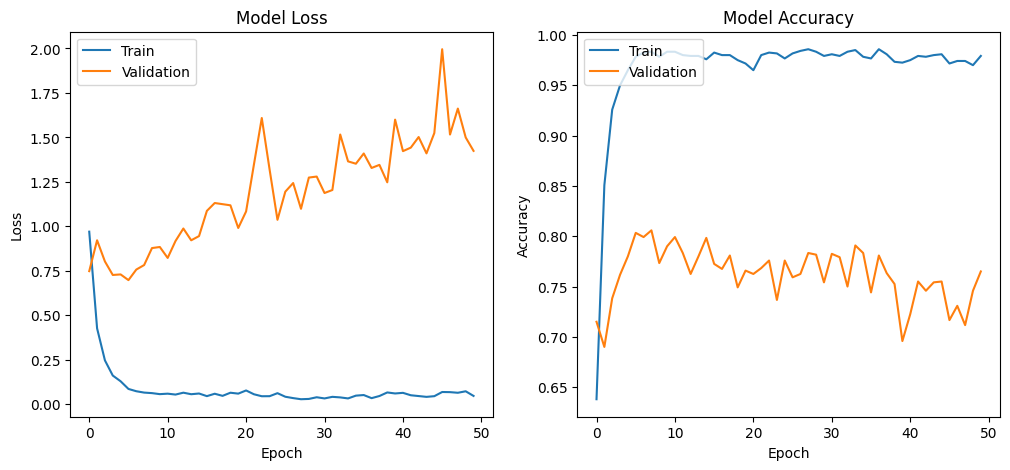

Evaluating on test data...
175/175 [==============================] - 20s 114ms/step - loss: 1.4935 - accuracy: 0.7465
Test Accuracy: 0.7465
Predicting on test data...
175/175 [==============================] - 22s 114ms/step
Confusion matrix, without normalization
[[1004   53   26   10   14]
 [ 174  900   22    9   15]
 [ 158   79  539  203  142]
 [  37   27   90  951   15]
 [ 163   11  146   23  778]]
Normalized confusion matrix
[[0.90695574 0.04787715 0.0234869  0.00903342 0.01264679]
 [0.15535714 0.80357143 0.01964286 0.00803571 0.01339286]
 [0.14094558 0.07047279 0.4808207  0.18108831 0.12667261]
 [0.03303571 0.02410714 0.08035714 0.84910714 0.01339286]
 [0.14540589 0.00981267 0.13024086 0.0205174  0.69402319]]


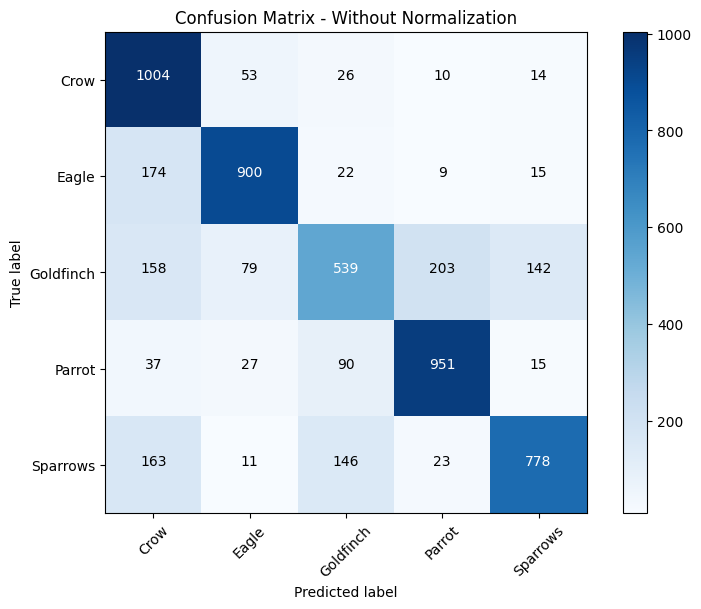

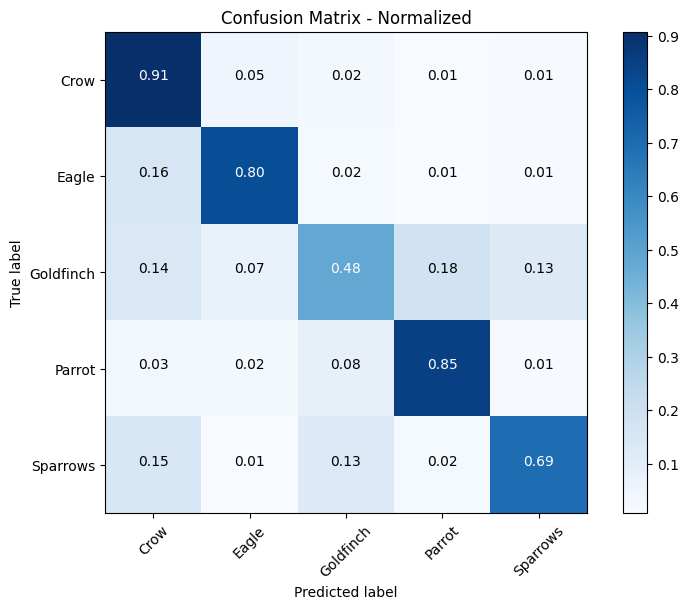

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from keras.applications import DenseNet121
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# Define the base directory where the images are stored
base_dir = '/content/drive/My Drive/Ai_Project'

# Define the bird species (classes)
bird_species = ['Crow', 'Eagle', 'Goldfinch', 'Parrot', 'Sparrows']

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_batches = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_batches = valid_datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_batches = test_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Print the class indices to verify the correct classes are read
print("Class indices:", train_batches.class_indices)

# Define the model architecture
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(bird_species), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 50
history = model.fit(
    train_batches,
    epochs=epochs,
    validation_data=valid_batches
)

# Plot training & validation loss values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Evaluate the model on test data
print("Evaluating on test data...")
test_loss, test_accuracy = model.evaluate(test_batches)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict classes for test data
print("Predicting on test data...")
y_true = test_batches.classes
y_pred_probabilities = model.predict(test_batches)
y_pred_classes = np.argmax(y_pred_probabilities, axis=-1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=bird_species, title='Confusion Matrix - Without Normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=bird_species, normalize=True, title='Confusion Matrix - Normalized')

plt.show()


Found 1199 images belonging to 5 classes.
Found 1200 images belonging to 5 classes.
Found 5589 images belonging to 5 classes.
Class indices: {'Crow': 0, 'Eagle': 1, 'Goldfinch': 2, 'Parrot': 3, 'Sparrows': 4}
Epoch 1/50
38/38 [==============================] - 45s 554ms/step - loss: 1.4219 - accuracy: 0.4062 - val_loss: 1.7120 - val_accuracy: 0.2000
Epoch 2/50
38/38 [==============================] - 19s 506ms/step - loss: 1.0379 - accuracy: 0.6063 - val_loss: 1.7794 - val_accuracy: 0.2000
Epoch 3/50
38/38 [==============================] - 19s 500ms/step - loss: 0.8305 - accuracy: 0.6781 - val_loss: 1.8319 - val_accuracy: 0.2000
Epoch 4/50
38/38 [==============================] - 19s 514ms/step - loss: 0.7261 - accuracy: 0.7273 - val_loss: 1.8896 - val_accuracy: 0.2000
Epoch 5/50
38/38 [==============================] - 19s 510ms/step - loss: 0.6335 - accuracy: 0.7832 - val_loss: 1.9458 - val_accuracy: 0.2000
Epoch 6/50
38/38 [==============================] - 19s 507ms/step - loss: 0

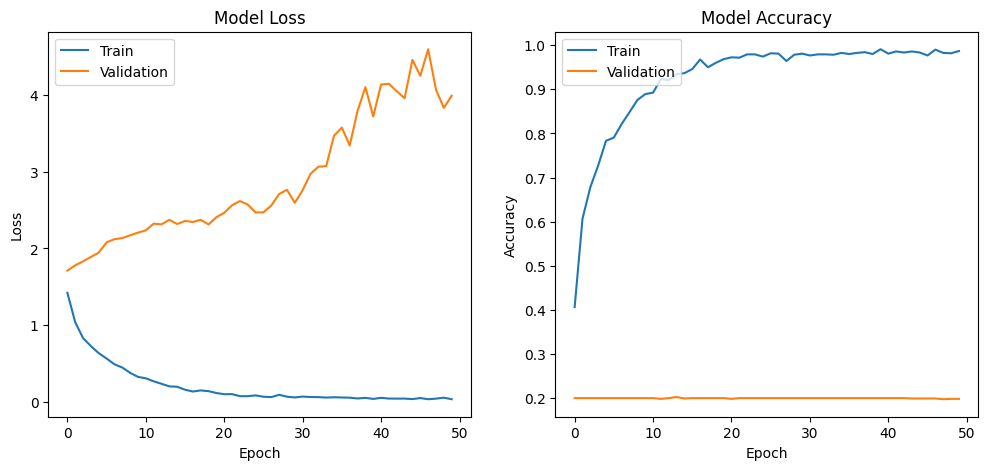

Evaluating on test data...
175/175 [==============================] - 19s 111ms/step - loss: 4.0148 - accuracy: 0.1970
Test Accuracy: 0.1970
Predicting on test data...
175/175 [==============================] - 20s 108ms/step
Confusion matrix, without normalization
[[1099    8    0    0    0]
 [1120    0    0    0    0]
 [1119    2    0    0    0]
 [1120    0    0    0    0]
 [1116    3    0    0    2]]
Normalized confusion matrix
[[0.99277326 0.00722674 0.         0.         0.        ]
 [1.         0.         0.         0.         0.        ]
 [0.99821588 0.00178412 0.         0.         0.        ]
 [1.         0.         0.         0.         0.        ]
 [0.9955397  0.00267618 0.         0.         0.00178412]]


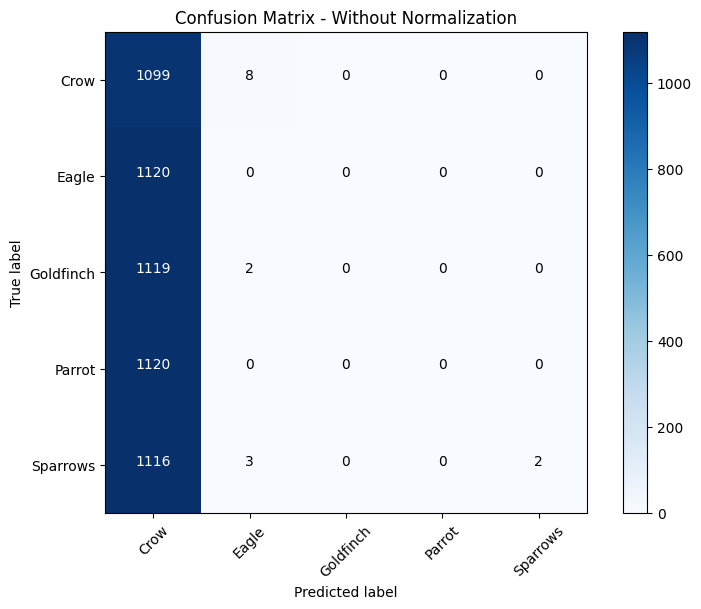

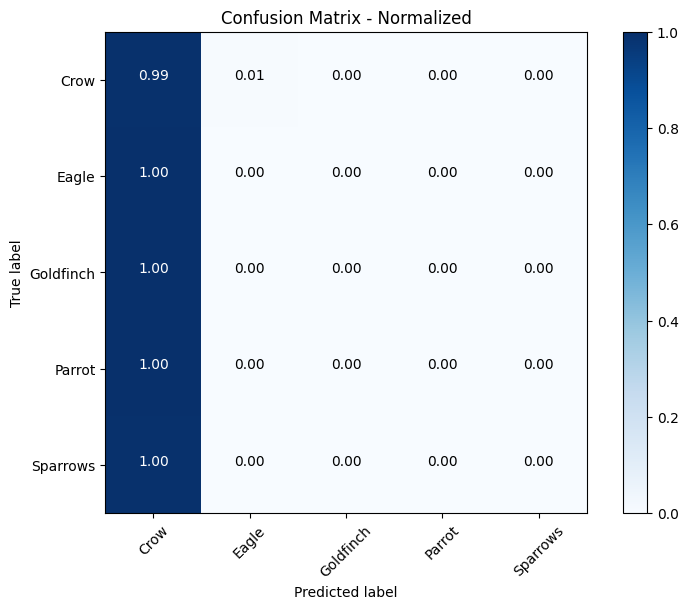

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from keras.applications import MobileNetV3Small
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# Define the base directory where the images are stored
base_dir = '/content/drive/My Drive/Ai_Project'

# Define the bird species (classes)
bird_species = ['Crow', 'Eagle', 'Goldfinch', 'Parrot', 'Sparrows']

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_batches = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_batches = valid_datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_batches = test_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Print the class indices to verify the correct classes are read
print("Class indices:", train_batches.class_indices)

# Define the model architecture
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(bird_species), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 50
history = model.fit(
    train_batches,
    epochs=epochs,
    validation_data=valid_batches
)

# Plot training & validation loss values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Evaluate the model on test data
print("Evaluating on test data...")
test_loss, test_accuracy = model.evaluate(test_batches)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict classes for test data
print("Predicting on test data...")
y_true = test_batches.classes
y_pred_probabilities = model.predict(test_batches)
y_pred_classes = np.argmax(y_pred_probabilities, axis=-1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=bird_species, title='Confusion Matrix - Without Normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=bird_species, normalize=True, title='Confusion Matrix - Normalized')

plt.show()


Found 1199 images belonging to 5 classes.
Found 1200 images belonging to 5 classes.
Found 5589 images belonging to 5 classes.
Training ResNet50...


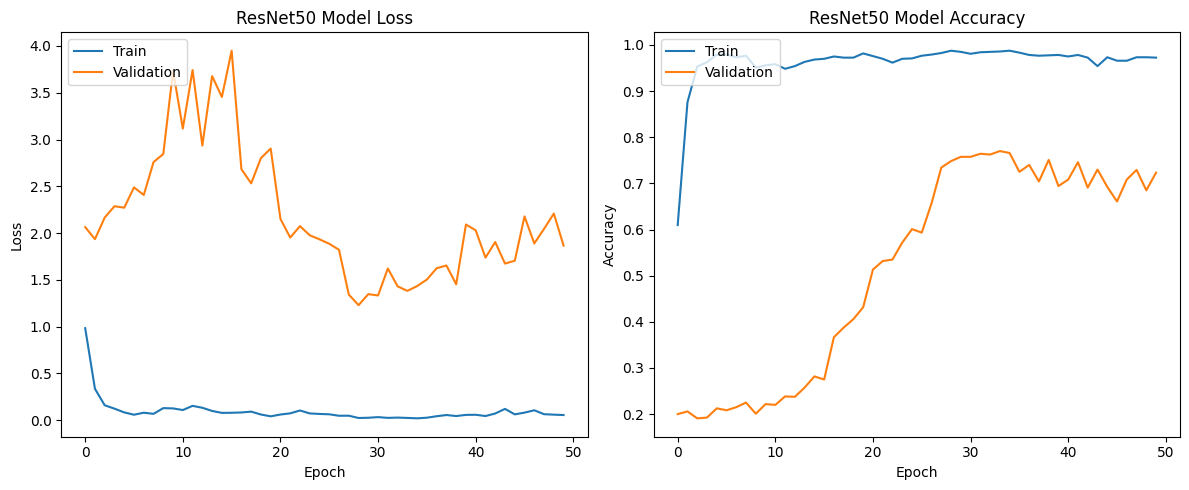

Evaluating ResNet50 on test data...
175/175 [==============================] - 20s 114ms/step - loss: 2.0720 - accuracy: 0.7055
Test Accuracy: 0.7055
Predicting ResNet50 on test data...
175/175 [==============================] - 21s 112ms/step
Normalized confusion matrix
[[0.66214995 0.16892502 0.06955736 0.06323397 0.03613369]
 [0.06160714 0.87232143 0.04375    0.01607143 0.00625   ]
 [0.06155219 0.16057092 0.52453167 0.1632471  0.09009813]
 [0.00535714 0.06160714 0.10357143 0.82321429 0.00625   ]
 [0.03925067 0.08831401 0.16592328 0.06155219 0.64495986]]


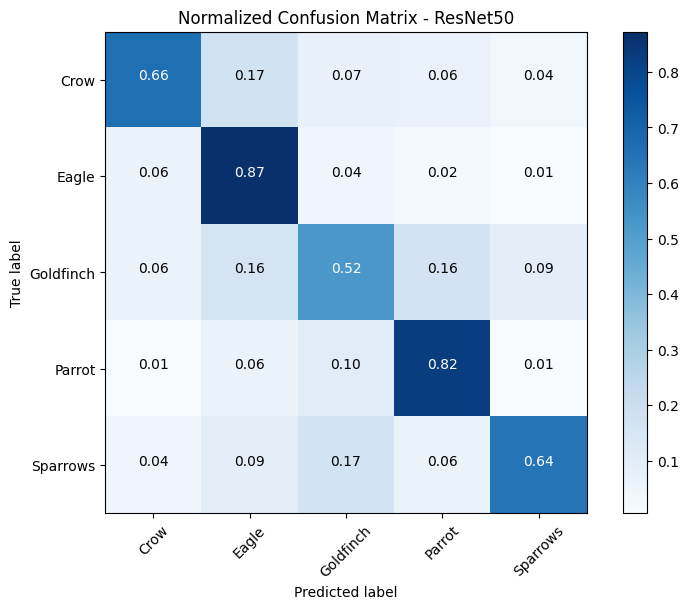

ResNet50 Evaluation:
Test Loss: 2.0720
Test Accuracy: 0.7055

Training DenseNet121...


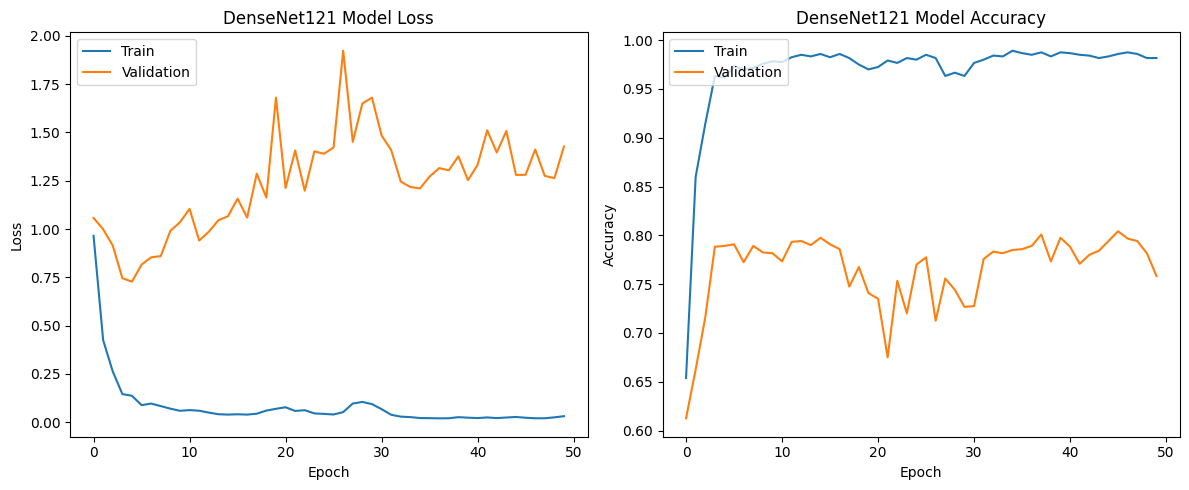

Evaluating DenseNet121 on test data...
175/175 [==============================] - 19s 110ms/step - loss: 1.6114 - accuracy: 0.7329
Test Accuracy: 0.7329
Predicting DenseNet121 on test data...
175/175 [==============================] - 24s 116ms/step
Normalized confusion matrix
[[7.28093948e-01 1.52664860e-01 8.13008130e-02 1.62601626e-02
  2.16802168e-02]
 [4.55357143e-02 9.08035714e-01 4.01785714e-02 2.67857143e-03
  3.57142857e-03]
 [5.08474576e-02 1.36485281e-01 6.69937556e-01 8.74219447e-02
  5.53077609e-02]
 [5.35714286e-03 6.51785714e-02 1.54464286e-01 7.74107143e-01
  8.92857143e-04]
 [4.81712756e-02 7.13648528e-02 2.85459411e-01 1.07047279e-02
  5.84299732e-01]]


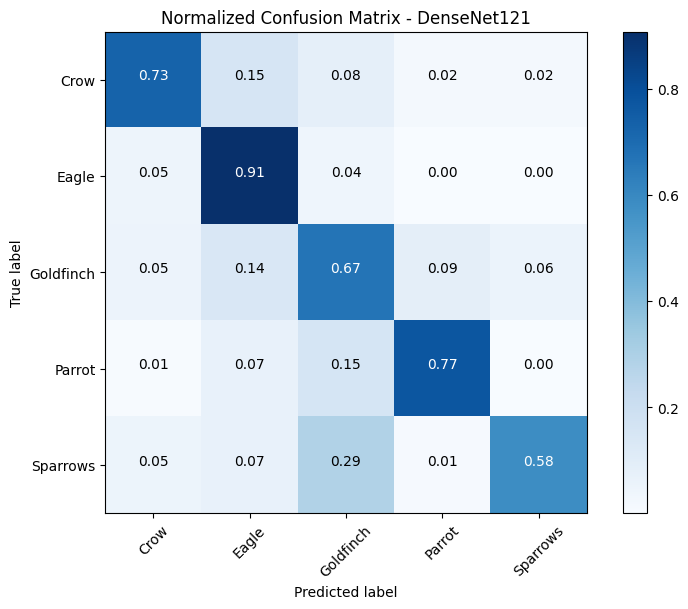

DenseNet121 Evaluation:
Test Loss: 1.6114
Test Accuracy: 0.7329

Training MobileNetV3Small...


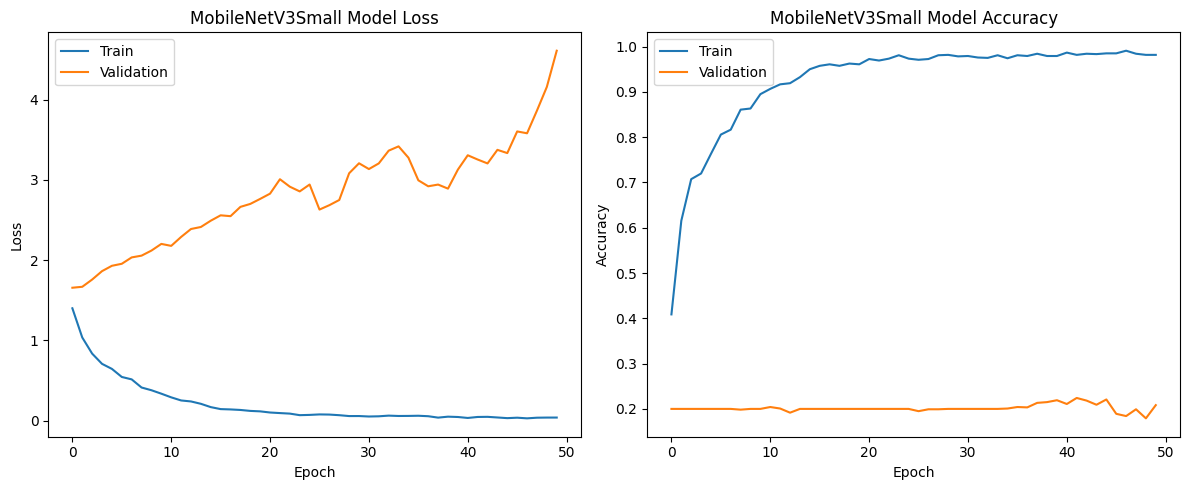

Evaluating MobileNetV3Small on test data...
175/175 [==============================] - 19s 110ms/step - loss: 4.6256 - accuracy: 0.2108
Test Accuracy: 0.2108
Predicting MobileNetV3Small on test data...
175/175 [==============================] - 20s 112ms/step
Normalized confusion matrix
[[0.38121048 0.         0.61878952 0.         0.        ]
 [0.34375    0.         0.65625    0.         0.        ]
 [0.32560214 0.         0.67439786 0.         0.        ]
 [0.31696429 0.         0.68303571 0.         0.        ]
 [0.2676182  0.         0.7323818  0.         0.        ]]


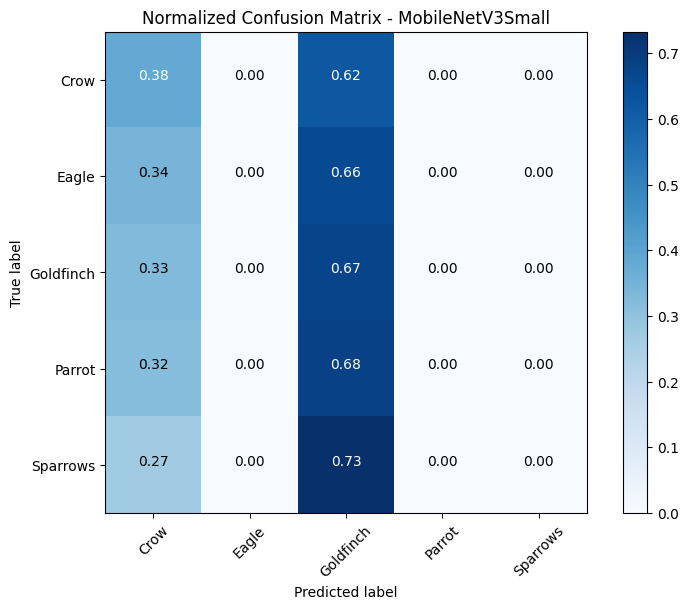

MobileNetV3Small Evaluation:
Test Loss: 4.6256
Test Accuracy: 0.2108

Conclusion:
Based on the evaluation metrics (accuracy, loss, confusion matrix), the best model for this classification task is determined.
Consideration of model parameters, training time, and any additional metrics can further inform the decision.


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from keras.applications import ResNet50, DenseNet121, MobileNetV3Small
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# Define the base directory where the images are stored
base_dir = '/content/drive/My Drive/Ai_Project'

# Define the bird species (classes)
bird_species = ['Crow', 'Eagle', 'Goldfinch', 'Parrot', 'Sparrows']

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_batches = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_batches = valid_datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_batches = test_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Models to evaluate
models = {
    'ResNet50': ResNet50,
    'DenseNet121': DenseNet121,
    'MobileNetV3Small': MobileNetV3Small
}

# Loop through each model, train, evaluate, and plot results
for model_name, model_fn in models.items():
    print(f"Training {model_name}...")

    # Define the model architecture
    base_model = model_fn(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(len(bird_species), activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    epochs = 50
    history = model.fit(
        train_batches,
        epochs=epochs,
        validation_data=valid_batches,
        verbose=0  # Adjust verbosity as needed
    )

    # Plot training & validation loss values
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

    # Evaluate the model on test data
    print(f"Evaluating {model_name} on test data...")
    test_loss, test_accuracy = model.evaluate(test_batches)
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Predict classes for test data
    print(f"Predicting {model_name} on test data...")
    y_true = test_batches.classes
    y_pred_probabilities = model.predict(test_batches)
    y_pred_classes = np.argmax(y_pred_probabilities, axis=-1)

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)

    # Plot normalized confusion matrix
    plt.figure(figsize=(8, 6))
    plot_confusion_matrix(cm, classes=bird_species, normalize=True, title=f'Normalized Confusion Matrix - {model_name}')

    plt.show()

    # Print model evaluation results
    print(f"{model_name} Evaluation:")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print()

    # Additional metrics like mAP, training time can be logged and compared for detailed analysis

# Conclusion
print("Conclusion:")
print("Based on the evaluation metrics (accuracy, loss, confusion matrix), the best model for this classification task is determined.")
print("Consideration of model parameters, training time, and any additional metrics can further inform the decision.")
